# KNN (K-Nearest Neighbors)

<ul>1. KNN melakukan prediksi berdasarkan kedekatan karakteristik dengan tetangga terdekat</ul>
<ul>2. Prediksi dapat dilakukan pada klasifikasi maupun regresi</ul>


In [1]:
import pandas as pd

sensus = {
    'berat' :[64, 86, 84, 80, 49, 59, 67, 54, 67],
    'tinggi':[158, 170, 183, 191, 155, 163, 180, 158, 178],
    'jk'    :['pria','pria','pria','pria','wanita','wanita',
              'wanita','wanita','wanita']
         }

sensus_df = pd.DataFrame(sensus)
sensus_df

,berat,tinggi,jk
0,64,158,pria
1,86,170,pria
2,84,183,pria
3,80,191,pria
4,49,155,wanita
5,59,163,wanita
6,67,180,wanita
7,54,158,wanita
8,67,178,wanita


# VISUALISASI DATA

d = pria
d = wanita


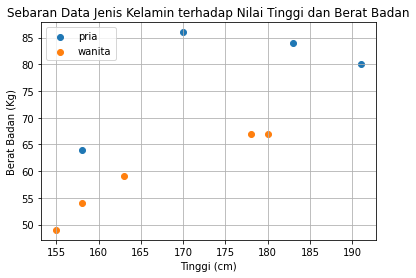

In [2]:
import matplotlib.pyplot as plt

for jk, d in sensus_df.groupby('jk') :
#     print(f'd = {d}')
    print(f'd = {jk}')
    plt.scatter(d['tinggi'], d['berat'], label = jk)

plt.grid(True)
plt.legend(loc = 'upper left')
plt.title('Sebaran Data Jenis Kelamin terhadap Nilai Tinggi dan Berat Badan')
plt.xlabel('Tinggi (cm)')
plt.ylabel('Berat Badan (Kg)')
plt.show()

# PREPROCESSING DATASET

In [3]:
import numpy as np

X_train = np.array(sensus_df[['tinggi', 'berat']])
y_train = np.array(sensus_df['jk'])

print(f'X_train = {X_train}')
print(f'y_train = {y_train}')

X_train = [[158  64]
 [170  86]
 [183  84]
 [191  80]
 [155  49]
 [163  59]
 [180  67]
 [158  54]
 [178  67]]
y_train = ['pria' 'pria' 'pria' 'pria' 'wanita' 'wanita' 'wanita' 'wanita' 'wanita']


In [4]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train:\n{y_train}')

y_train:
[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [5]:
y_train = y_train.flatten()
print(f'y_train = {y_train}')

y_train = [0 0 0 0 1 1 1 1 1]


# TRAINING KNN CLASSIFICATON MODEL

In [6]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# PREDIKSI JENIS KELAMIN

In [17]:
tinggi_badan = 155
berat_badan = 70
X_new = np.array([tinggi_badan, berat_badan]).reshape(1, -1)
X_new

array([[155,  70]])

In [18]:
y_new = model.predict(X_new)
y_new

array([1])

In [19]:
lb.inverse_transform(y_new)

array(['wanita'], dtype='<U6')

# VISUALISASI NEAREST NEIGBORS

d = pria
d = wanita


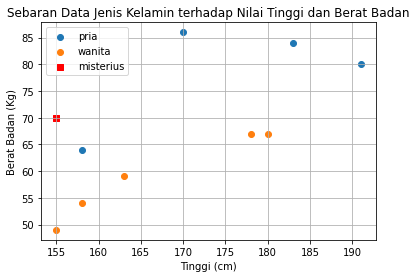

In [21]:
for jk, d in sensus_df.groupby('jk') :
#     print(f'd = {d}')
    print(f'd = {jk}')
    plt.scatter(d['tinggi'], d['berat'], label = jk)

plt.scatter(tinggi_badan, berat_badan, marker = 's', 
            color = 'red', label = 'misterius')

plt.grid(True)
plt.legend(loc = 'upper left')
plt.title('Sebaran Data Jenis Kelamin terhadap Nilai Tinggi dan Berat Badan')
plt.xlabel('Tinggi (cm)')
plt.ylabel('Berat Badan (Kg)')
plt.show()

# KALKULASI DISTANCE (EUCLIDEAN DISTANCE

<ol>Dalam menentukan response variable dengan menggunakan classifier KNN yaitu menggunakan jumlah jarak tetangga terdekatnya yang di definisikan dengan K (n_neighbors = K)</ol>
<ol>Untuk mengetahui jarak tersebut dapat dilakukan perhitungan jarak menggunakan Euclidean Distance yang mengukur jarak resultan dari kedua titik yang ingin diukur jaraknya</ol>

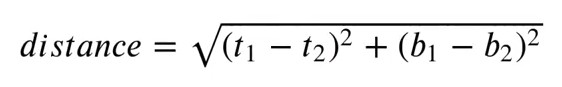

In [22]:
misterius = np.array([tinggi_badan, berat_badan])
misterius

array([155,  70])

In [23]:
X_train

array([[158,  64],
       [170,  86],
       [183,  84],
       [191,  80],
       [155,  49],
       [163,  59],
       [180,  67],
       [158,  54],
       [178,  67]], dtype=int64)

In [35]:
from scipy.spatial.distance import euclidean

data_jarak = [euclidean(misterius, d) for d in X_train]
data_jarak

[6.708203932499369,
 21.93171219946131,
 31.304951684997057,
 37.36308338453881,
 21.0,
 13.601470508735444,
 25.179356624028344,
 16.278820596099706,
 23.194827009486403]

In [36]:
sensus_df['jarak'] = data_jarak
sensus_df.sort_values(['jarak'])

,berat,tinggi,jk,jarak
0,64,158,pria,6.708204
5,59,163,wanita,13.601471
7,54,158,wanita,16.278821
4,49,155,wanita,21.000000
1,86,170,pria,21.931712
8,67,178,wanita,23.194827
6,67,180,wanita,25.179357
2,84,183,pria,31.304952
3,80,191,pria,37.363083


# EVALUASI KNN CLASSIFICATION MODEL

## TESTING SET

In [38]:
X_test = [[168, 65],[180, 96],[160, 52],[169, 67]]
y_test = lb.transform(np.array(['pria', 'pria','wanita', 'wanita'])).flatten()

print(f'X_test:{X_test}')
print(f'y_test:{y_test}')

X_test:[[168, 65], [180, 96], [160, 52], [169, 67]]
y_test:[0 0 1 1]


## PREDIKSI

In [42]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 1])

## METRIC EVALUASI 1 : ACCURACY

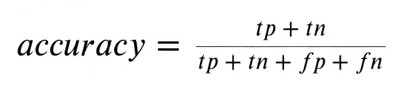

In [43]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print(f'Accuracy = {acc}')

Accuracy = 0.75


## METRIC EVALUASI 2 : PRECISSION

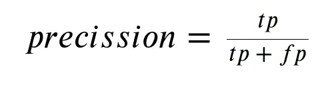

In [46]:
from sklearn.metrics import precision_score

prec = precision_score(y_test, y_pred)

print(f'Precission = {prec}')

Precission = 0.6666666666666666


## METRIC EVALUASI 3 : RECALL

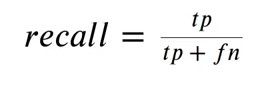

In [47]:
from sklearn.metrics import recall_score

rec = recall_score(y_test, y_pred)

print(f'Recall = {rec}')

Recall = 1.0


## METRIC EVALUASI 4 : F1 SCORE

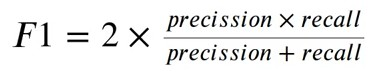

In [48]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)

print(f'F1 = {f1}')

F1 = 0.8


# CLASSIFICATION REPORT

In [50]:
from sklearn.metrics import classification_report

rep = classification_report(y_test, y_pred)

print(f'Classification Report = \n{rep}\n')

Classification Report = 
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4




## METRIC EVALUASI 5 : MATTHEW CORRELATION COEFFICIENT (MCC)

Alternatif dari F1 untuk mengukur performa klasifikasi biner dengan rentang nilai -1 sampai 1.

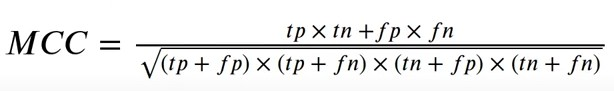

In [52]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)

print(f'MCC = {mcc}')

MCC = 0.5773502691896258
